In [1]:
!pip install https://github.com/adebayoj/fairml/archive/master.zip

  Using cached https://github.com/adebayoj/fairml/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LogisticRegression

# import specific projection format.
from fairml import audit_model
from fairml import plot_dependencies

plt.style.use('ggplot')
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

In [3]:
# read in data
data = pd.read_csv("Heart_Disease_Prediction.csv")

# map target to 0 and 1
data.target = data.target.map({'Presence': 1, 'Absence': 0})

# quick data processing
compas_rating = data.target.values
data = data.drop("target", axis=1)

In [4]:
#  quick setup of Logistic regression
#  perhaps use a more crazy classifier
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(data.values, compas_rating)

/home/diego/mltools/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [5]:
#  call audit model
importancies, _ = audit_model(clf.predict, data)

# print feature importance
print(importancies)

# file_name = "fairml_linear_direct.png"
# plt.savefig(file_name, transparent=False, bbox_inches='tight', dpi=250)

Feature: Age,	 Importance: -0.06296296296296296
Feature: Sex,	 Importance: 0.007407407407407408
Feature: Chest pain type,	 Importance: 0.022222222222222223
Feature: BP,	 Importance: 0.06666666666666667
Feature: Cholesterol,	 Importance: 0.05555555555555555
Feature: FBS over 120,	 Importance: 0.011111111111111112
Feature: EKG results,	 Importance: 0.0
Feature: Max HR,	 Importance: -0.12222222222222222
Feature: Exercise angina,	 Importance: 0.044444444444444446
Feature: ST depression,	 Importance: 0.044444444444444446
Feature: Slope of ST,	 Importance: 0.003703703703703704
Feature: Number of vessels fluro,	 Importance: 0.05555555555555555
Feature: Thallium,	 Importance: 0.044444444444444446


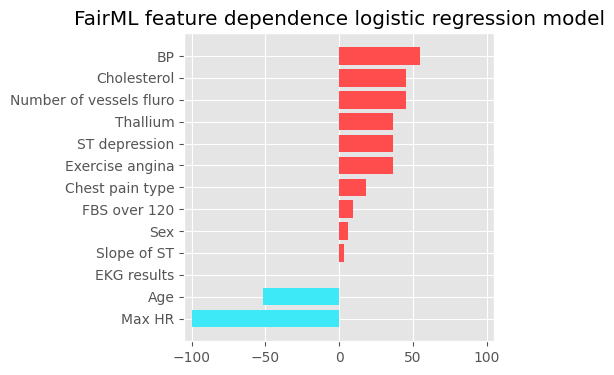

In [7]:
# generate feature dependence plot
fig = plot_dependencies(
    importancies.median(),
    reverse_values=False,
    title="FairML feature dependence logistic regression model"
)
fig
